# APRENDIZAJE SUPERVISADO

## Importación de librerias

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn import svm

## Lectura del dataset

In [232]:
URL_TRAIN_DATA = "https://www.famaf.unc.edu.ar/~nocampo043/travel_insurance_prediction_train.csv"
URL_TEST_DATA = "https://www.famaf.unc.edu.ar/~nocampo043/travel_insurance_prediction_test.csv"


df_train = pd.read_csv(URL_TRAIN_DATA)
df_test = pd.read_csv(URL_TEST_DATA)

In [233]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [234]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [235]:
df_train

Customer  Age               Employment Type GraduateOrNot  AnnualIncome  \
0            1   33  Private Sector/Self Employed           Yes        550000   
1            2   28  Private Sector/Self Employed           Yes        800000   
2            3   31  Private Sector/Self Employed           Yes       1250000   
3            4   31             Government Sector            No        300000   
4            5   28  Private Sector/Self Employed           Yes       1250000   
...        ...  ...                           ...           ...           ...   
1485      1486   31             Government Sector            No        300000   
1486      1487   31  Private Sector/Self Employed           Yes        950000   
1487      1488   28  Private Sector/Self Employed           Yes       1250000   
1488      1489   31             Government Sector           Yes       1300000   
1489      1490   30  Private Sector/Self Employed            No        650000   

      FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0                 6                0            No                  No   
1                 7                0           Yes                  No   
2                 4                0            No                  No   
3                 7                0            No                  No   
4                 3                0            No                  No   
...             ...              ...           ...                 ...   
1485              5                0            No                  No   
1486              3                0           Yes                  No   
1487              5                0            No                  No   
1488              5                0            No                  No   
1489              4                0            No                  No   

      TravelInsurance  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
1485                0  
1486                0  
1487                0  
1488                0  
1489                0  

[1490 rows x 10 columns]

In [236]:
df_test

Customer  Age               Employment Type GraduateOrNot  AnnualIncome  \
0        1491   29  Private Sector/Self Employed           Yes       1100000   
1        1492   28  Private Sector/Self Employed           Yes        750000   
2        1493   31             Government Sector           Yes       1500000   
3        1494   28  Private Sector/Self Employed           Yes       1400000   
4        1495   33  Private Sector/Self Employed           Yes       1500000   
..        ...  ...                           ...           ...           ...   
492      1983   33             Government Sector           Yes       1750000   
493      1984   25  Private Sector/Self Employed            No       1150000   
494      1985   29  Private Sector/Self Employed           Yes       1050000   
495      1986   25             Government Sector           Yes        750000   
496      1987   27             Government Sector           Yes       1050000   

     FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  
0                4                0            No                  No  
1                5                1           Yes                  No  
2                4                0           Yes                 Yes  
3                3                0            No                 Yes  
4                4                0           Yes                 Yes  
..             ...              ...           ...                 ...  
492              6                0            No                  No  
493              3                1            No                  No  
494              5                0            No                  No  
495              2                0            No                 Yes  
496              3                0            No                  No  

[497 rows x 9 columns]

## Análisis descriptivo

In [237]:
df_train.describe().round()

Customer     Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count    1490.0  1490.0        1490.0         1490.0           1490.0   
mean      746.0    30.0      927819.0            5.0              0.0   
std       430.0     3.0      381172.0            2.0              0.0   
min         1.0    25.0      300000.0            2.0              0.0   
25%       373.0    28.0      600000.0            4.0              0.0   
50%       746.0    29.0      900000.0            5.0              0.0   
75%      1118.0    32.0     1250000.0            6.0              1.0   
max      1490.0    35.0     1800000.0            9.0              1.0   

       TravelInsurance  
count           1490.0  
mean               0.0  
std                0.0  
min                0.0  
25%                0.0  
50%                0.0  
75%                1.0  
max                1.0

### Variable objetivo o target: Travel Insurance

In [238]:
df_train["TravelInsurance"].value_counts()

0    958
1    532
Name: TravelInsurance, dtype: int64

<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

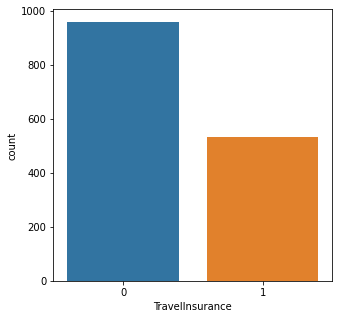

In [239]:
fig = plt.figure(figsize=(5,5))
sns.countplot(data=df_train, x="TravelInsurance")

### Correlación variables

In [240]:
corr = df_train[["TravelInsurance","AnnualIncome", "Age"]].corr().round(2)
corr = corr[['TravelInsurance']]
corr.loc[:, 'abs_corr'] = np.abs(corr['TravelInsurance'])
corr.sort_values(by='abs_corr', ascending=False)

TravelInsurance  abs_corr
TravelInsurance             1.00      1.00
AnnualIncome                0.40      0.40
Age                         0.07      0.07

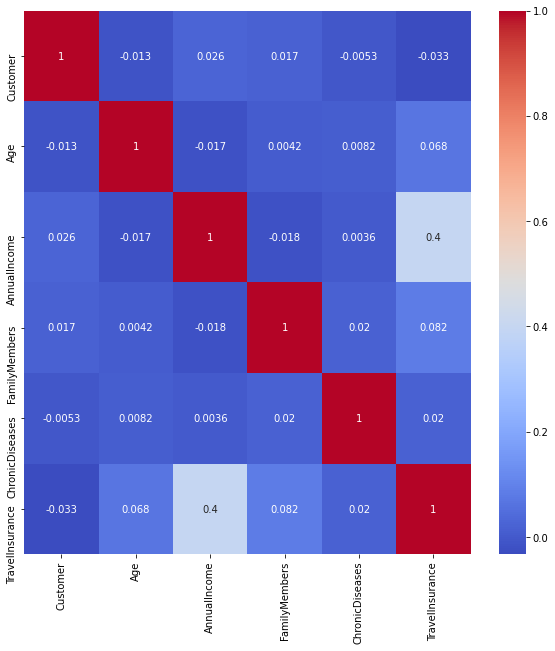

In [241]:
plt.figure(figsize=(10,10))
corr = df_train.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot=True, cmap= 'coolwarm')
plt.show()

### Variable explicativa: Age

En primer lugar, observamos la distribución de la variable Age en el df_train.

<AxesSubplot:xlabel='Age', ylabel='count'>

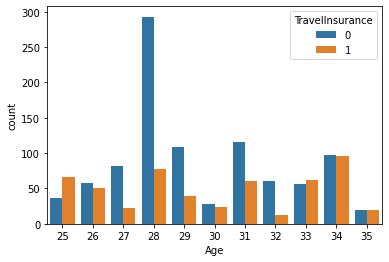

In [242]:
sns.countplot(data=df_train, x="Age", hue="TravelInsurance")

In [243]:
df_train[["TravelInsurance", "Age"]].groupby("TravelInsurance").describe()

Age                                                   
                 count       mean       std   min   25%   50%   75%   max
TravelInsurance                                                          
0                958.0  29.520877  2.623956  25.0  28.0  29.0  31.0  35.0
1                532.0  29.930451  3.279919  25.0  27.0  30.0  33.0  35.0

Podemos observar que se encuentran fluctuaciones con respecto a la edad.

### Variable explicativa: AnnualIncome

En primer lugar, observamos la distribución de la variable Annual Income en el df_train.

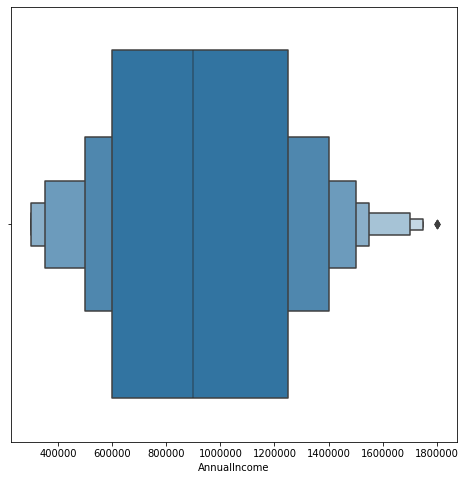

In [244]:
fig = plt.figure(figsize=(8,8))
sns.boxenplot(data=df_train, x="AnnualIncome")
plt.ticklabel_format(style='plain', axis='x')

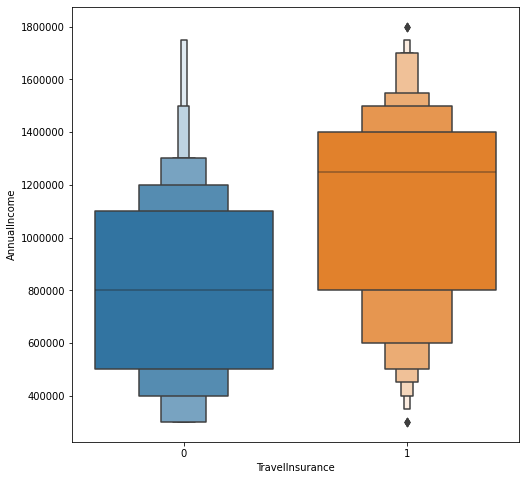

In [245]:
fig = plt.figure(figsize=(8,8))
sns.boxenplot(data=df_train, x="TravelInsurance", y="AnnualIncome")
plt.ticklabel_format(style='plain', axis='y')

In [246]:
(
    df_train[["TravelInsurance", "AnnualIncome"]]
        .groupby(["TravelInsurance"])
        .describe()
)

AnnualIncome                                                   \
                       count          mean            std       min       25%   
TravelInsurance                                                                 
0                      958.0  8.155010e+05  334762.832654  300000.0  500000.0   
1                      532.0  1.130075e+06  376433.348548  300000.0  800000.0   

                                                  
                       50%        75%        max  
TravelInsurance                                   
0                 800000.0  1100000.0  1750000.0  
1                1250000.0  1400000.0  1800000.0

Podemos observar que la distribución de la variable Annual Income se ve afectada en gran medida, al condicionarla por las distintas clases de la variable TARGET. Si bien los valores mínimos y máximos son similares, la media y la mediana difieren considerablemente, como así también el rango intercuantil.
Es una varible que se considera importante para explicar el comportamiento de Y.

### Variable explicativa: Employment Type

In [247]:
df_train["Employment Type"].value_counts()
pd.crosstab(df_train["TravelInsurance"], df_train["GraduateOrNot"])

GraduateOrNot     No  Yes
TravelInsurance          
0                141  817
1                 81  451

Employment Type  Government Sector  Private Sector/Self Employed
TravelInsurance                                                 
0                              333                           625
1                              100                           432

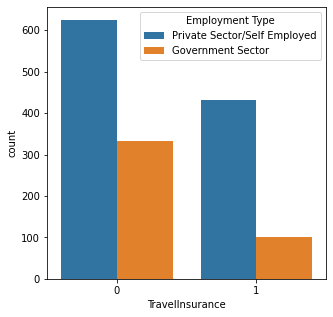

In [248]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(data=df_train,
              x="TravelInsurance",
              hue=df_train["Employment Type"])
pd.crosstab(df_train["TravelInsurance"], df_train["Employment Type"])

### Variable explicativa: Graduate Or Not

In [249]:
df_train["GraduateOrNot"].value_counts()

Yes    1268
No      222
Name: GraduateOrNot, dtype: int64

<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

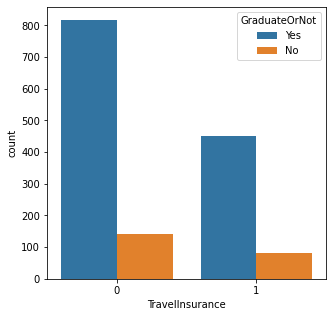

In [250]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(data=df_train,
              x="TravelInsurance",
              hue=df_train["GraduateOrNot"])

### Variable explicativa: Employment Type

<AxesSubplot:xlabel='Employment Type', ylabel='count'>

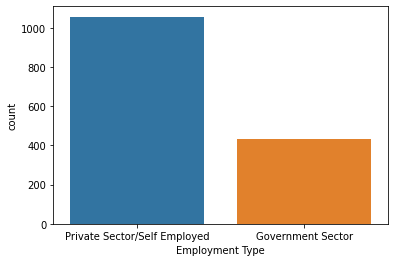

In [251]:
sns.countplot(data=df_train, x="Employment Type")

### Variable explicativa: Family Members

In [252]:
df_train.columns

Index(['Customer', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

<AxesSubplot:xlabel='FamilyMembers', ylabel='Count'>

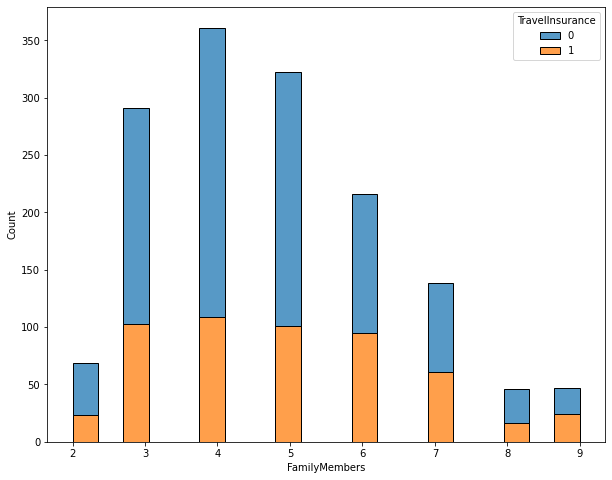

In [253]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_train, x="FamilyMembers", hue= 'TravelInsurance', multiple="stack")

### Variable explicativa: Chronic Diseases

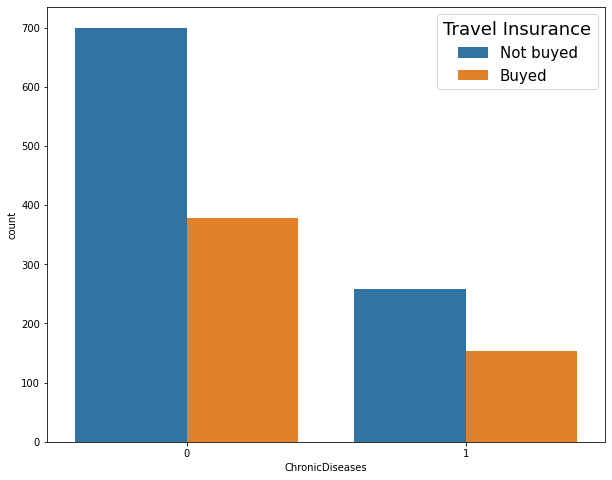

In [254]:
plt.figure(figsize=(10,8))
ax= sns.countplot(data= df_train, x="ChronicDiseases", hue= "TravelInsurance")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Not buyed', 'Buyed'], #ver de cambiar!
          title_fontsize = 18,
          fontsize = 15,
          bbox_to_anchor=(1,1),
          title='Travel Insurance')

### Variable explicativa: FrequentFlyer

FrequentFlyer     No  Yes
TravelInsurance          
0                823  135
1                350  182

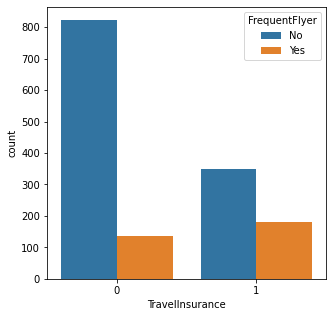

In [255]:
fig = plt.figure(figsize=(5,5))
sns.countplot(data=df_train, x="TravelInsurance", hue=df_train.FrequentFlyer)

pd.crosstab(df_train["TravelInsurance"], df_train["FrequentFlyer"])

Se puede observar en este gráfico que si no sos viajero frecuente la cantidad
de clientes que contratan un seguro es baja, caso contrario la cantidad de
contratar un seguro es pareja.

### Variable explicativa: EverTravelledAbroad

EverTravelledAbroad   No  Yes
TravelInsurance              
0                    896   62
1                    306  226

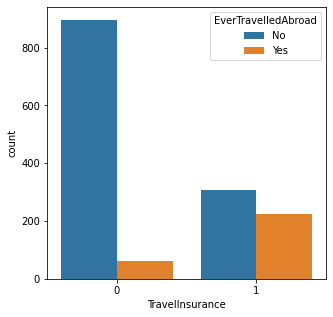

In [256]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(data=df_train, x="TravelInsurance", hue=df_train.EverTravelledAbroad)

pd.crosstab(df_train["TravelInsurance"], df_train["EverTravelledAbroad"])

## Creación del train y validation
Para el entrenamiento de los modelos no utilizaremos las variable Customer y
Travel Insurance (Target)

In [257]:
seed = 0

X_train_total = df_train.drop(["Customer","TravelInsurance"], axis=1)
y_train_total = df_train["TravelInsurance"]

In [258]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_total,
                                                      y_train_total,
                                                      test_size=0.2,
                                                      random_state=seed)
X_test = df_test.drop("Customer", axis=1)

## Modelos propuestos

### Regresión Logística: Default

In [259]:
numerical_cols = X_train_total.select_dtypes(
    include=['float64', 'int64']).columns

categorical_cols = X_train_total.select_dtypes(include=['object']).columns

vars_to_scale = ["Age", "AnnualIncome", "FamilyMembers"]

preprocessor = ColumnTransformer(
    [("encoder", OneHotEncoder(), categorical_cols),
     ("scaler", StandardScaler(), vars_to_scale)],
    remainder="passthrough")

pipe_lgr = Pipeline([
    ("preprocessor", preprocessor),
    ("lgr", LogisticRegression(random_state=seed))
])
pipe_lgr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('lgr', LogisticRegression(random_state=0))])

In [260]:
pipe_lgr["lgr"].classes_

array([0, 1], dtype=int64)

In [261]:
pipe_lgr["lgr"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [262]:
y_train_pred_lreg = pipe_lgr.predict(X_train)
y_val_pred_lreg = pipe_lgr.predict(X_valid)
y_test_pred_lreg = pipe_lgr.predict(X_test)

In [263]:
text = "Logistic Regression - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       766
           1       0.79      0.50      0.61       426

    accuracy                           0.77      1192
   macro avg       0.78      0.71      0.73      1192
weighted avg       0.78      0.77      0.76      1192



In [264]:
text = "Logistic Regression - Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       192
           1       0.78      0.46      0.58       106

    accuracy                           0.76       298
   macro avg       0.77      0.69      0.71       298
weighted avg       0.76      0.76      0.74       298



### Regresión Logística: Busqueda de hiperparámetros

In [265]:
params_lreg = {
    "lgr__penalty": ["l1", "l2"],
    "lgr__class_weight": ["balanced"],
    "lgr__solver": ["liblinear", "saga"],
    "lgr__max_iter": [5000]
}

clf = GridSearchCV(pipe_lgr, param_grid=params_lreg, scoring="f1")
clf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'AnnualIncome',
                                                                          'FamilyMembers'])])),
                                       ('lgr',
           

In [266]:
clf.best_params_

{'lgr__class_weight': 'balanced',
 'lgr__max_iter': 5000,
 'lgr__penalty': 'l2',
 'lgr__solver': 'liblinear'}

In [267]:
clf.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('lgr',
                 LogisticRegression(class_weight='balanced', max_iter=5000,
                                    random_state=0, solver='liblinear'))])

In [268]:
y_train_pred_lreg = clf.best_estimator_.predict(X_train)
y_val_pred_lreg = clf.best_estimator_.predict(X_valid)
y_test_pred_lreg = clf.best_estimator_.predict(X_test)

In [269]:
text = "Logistic Regression - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       766
           1       0.65      0.62      0.64       426

    accuracy                           0.74      1192
   macro avg       0.72      0.72      0.72      1192
weighted avg       0.74      0.74      0.74      1192



In [270]:
text = "Logistic Regression - Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       192
           1       0.62      0.65      0.63       106

    accuracy                           0.73       298
   macro avg       0.71      0.71      0.71       298
weighted avg       0.74      0.73      0.73       298



### Segundo modelo de prueba: Árbol de decisión

In [271]:
pipe_dtree = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(random_state=seed))
])
pipe_dtree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('model', DecisionTreeClassifier(random_state=0))])

In [272]:
y_train_pred_dtree = pipe_dtree.predict(X_train)
y_valid_pred_dtree = pipe_dtree.predict(X_valid)
y_test_pred_dtree = pipe_lgr.predict(X_test)

In [273]:
train_acc = accuracy_score(y_train, y_train_pred_dtree)
valid_acc = accuracy_score(y_valid, y_valid_pred_dtree)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Val accuracy: {valid_acc:0.2}')

Train accuracy: 0.94
Val accuracy: 0.77


### SGD Classifier: Default

In [274]:
#si queremos utilizar menos feutures usar estos conjuntos
X_train_parc = X_train.drop(["Employment Type", "GraduateOrNot","GraduateOrNot"], axis=1)
X_valid_parc = X_valid.drop(["Employment Type", "GraduateOrNot","GraduateOrNot"], axis=1)

In [275]:
numerical_cols = X_train.select_dtypes(
    include=['float64', 'int64']).columns

categorical_cols = X_train.select_dtypes(include=['object']).columns

vars_to_scale = ["Age", "AnnualIncome", "FamilyMembers"]

preprocessor = ColumnTransformer(
    [("encoder", OneHotEncoder(), categorical_cols),
     ("scaler", StandardScaler(), vars_to_scale)],
    remainder="passthrough")

pipe_sgd = Pipeline([
    ("preprocessor", preprocessor),
    ("sgd", SGDClassifier(random_state=seed))
])
pipe_sgd.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('sgd', SGDClassifier(random_state=0))])

In [276]:
pipe_sgd["sgd"].classes_

array([0, 1], dtype=int64)

In [277]:
pipe_sgd["sgd"].get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [278]:
y_train_pred_sgd = pipe_sgd.predict(X_train)
y_val_pred_sgd = pipe_sgd.predict(X_valid)
# y_test_pred_sgd = pipe_sgd.predict(X_test)

In [279]:
text = "SGD Classifier  - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_sgd))

SGD Classifier  - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       766
           1       0.75      0.49      0.59       426

    accuracy                           0.76      1192
   macro avg       0.76      0.70      0.71      1192
weighted avg       0.76      0.76      0.75      1192



In [280]:
text = "SGD Classifier  -Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_sgd))

SGD Classifier  -Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       192
           1       0.69      0.44      0.54       106

    accuracy                           0.73       298
   macro avg       0.72      0.67      0.68       298
weighted avg       0.72      0.73      0.71       298



### SGD Classifier: Busqueda de hiperparámetros

In [281]:
params_sgd = {
    "sgd__penalty": ["l1", "l2"],
    "sgd__alpha": [0.01, 0.1, 0.001, 0.0001],
    "sgd__loss": ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    "sgd__eta0": [10, 1e-2, 1e-3, 1e-4],
    "sgd__learning_rate": ['optimal', 'constant', 'adaptive']
}
clf = GridSearchCV(pipe_sgd, param_grid=params_sgd, scoring="f1")
clf.fit(X_train, y_train)

c:\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'AnnualIncome',
                                                                          'FamilyMembers'])])),
                                       ('sgd', SGDClassifi

In [282]:
clf.best_params_

{'sgd__alpha': 0.001,
 'sgd__eta0': 0.001,
 'sgd__learning_rate': 'adaptive',
 'sgd__loss': 'log',
 'sgd__penalty': 'l2'}

In [283]:
clf.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('sgd',
                 SGDClassifier(alpha=0.001, eta0=0.001,
                               learning_rate='adaptive', loss='log',
                               random_state=0))])

In [284]:
y_train_pred_lreg = clf.best_estimator_.predict(X_train)
y_val_pred_lreg = clf.best_estimator_.predict(X_valid)
# y_test_pred_lreg = clf.best_estimator_.predict(X_test)

In [285]:
text = "SGD Classifier - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_sgd))

SGD Classifier - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       766
           1       0.75      0.49      0.59       426

    accuracy                           0.76      1192
   macro avg       0.76      0.70      0.71      1192
weighted avg       0.76      0.76      0.75      1192



In [286]:
text = "SGD Classifier - Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_sgd))

SGD Classifier - Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       192
           1       0.69      0.44      0.54       106

    accuracy                           0.73       298
   macro avg       0.72      0.67      0.68       298
weighted avg       0.72      0.73      0.71       298



Para el caso del modelo SGD Classifier se obtienen mejores resultados con el conjunto de train completo.

### SVM Lineal: Default

In [340]:
numerical_cols = X_train.select_dtypes(
    include=['float64', 'int64']).columns

categorical_cols = X_train.select_dtypes(include=['object']).columns

vars_to_scale = ["Age", "AnnualIncome", "FamilyMembers"]

preprocessor = ColumnTransformer(
    [("encoder", OneHotEncoder(), categorical_cols),
     ("scaler", StandardScaler(), vars_to_scale)],
    remainder="passthrough")

pipe_svm_l = Pipeline([
    ("preprocessor", preprocessor),
    ("svm_l", svm.LinearSVC(random_state=seed))
])
pipe_svm_l.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('svm_l', LinearSVC(random_state=0))])

In [341]:
pipe_svm_l["svm_l"].classes_

array([0, 1], dtype=int64)

In [342]:
pipe_svm_l["svm_l"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [343]:
y_train_pred_svm_l = pipe_svm_l.predict(X_train)
y_val_pred_svm_l = pipe_svm_l.predict(X_valid)
# y_test_pred_sgd = pipe_sgd.predict(X_test)

In [344]:
text = "SVM Lineal  - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_svm_l))

SVM Lineal  - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       766
           1       0.78      0.48      0.59       426

    accuracy                           0.77      1192
   macro avg       0.77      0.70      0.71      1192
weighted avg       0.77      0.77      0.75      1192



In [345]:
text = "SVM Lineal  -Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_svm_l))

SVM Lineal  -Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       192
           1       0.80      0.46      0.59       106

    accuracy                           0.77       298
   macro avg       0.78      0.70      0.71       298
weighted avg       0.78      0.77      0.75       298



### SVM Lineal: Busqueda de hiperparámetros

In [346]:
params_svm_l = {
    "svm_l__penalty": ["l1", "l2"],
    "svm_l__loss": ['hinge', 'squared_hinge'],
    "svm_l__tol": [1e-2, 1e-3, 1e-4],
    "svm_l__C": [1, 0.1, 0.01, 0.001, 0.0001, 10],
    "svm_l__class_weight": ['dic', 'balanced']   
}
clf = GridSearchCV(pipe_svm_l, param_grid=params_svm_l, scoring="f1")
clf.fit(X_train, y_train)

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\python39\lib\site-packages\sklearn\svm\_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "c:\python39\lib\site-packages\sklearn\svm\_base.py", line 939, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_,
  File "c:\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\python39\lib\site-packages\skl

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'AnnualIncome',
                                                                          'FamilyMembers'])])),
                                       ('svm_l', LinearSVC

In [347]:
clf.best_params_

{'svm_l__C': 10,
 'svm_l__class_weight': 'balanced',
 'svm_l__loss': 'squared_hinge',
 'svm_l__penalty': 'l2',
 'svm_l__tol': 0.01}

In [348]:
clf.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('svm_l',
                 LinearSVC(C=10, class_weight='balanced', random_state=0,
                           tol=0.01))])

In [349]:
y_train_pred_smv_l = clf.best_estimator_.predict(X_train)
y_val_pred_smv_l = clf.best_estimator_.predict(X_valid)
# y_test_pred_lreg = clf.best_estimator_.predict(X_test)

In [350]:
text = "SVL Lineal - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_smv_l))

SVL Lineal - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       766
           1       0.67      0.61      0.64       426

    accuracy                           0.75      1192
   macro avg       0.73      0.72      0.72      1192
weighted avg       0.75      0.75      0.75      1192



In [351]:
text = "SVM Lineal - Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_svm_l))

SVM Lineal - Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       192
           1       0.80      0.46      0.59       106

    accuracy                           0.77       298
   macro avg       0.78      0.70      0.71       298
weighted avg       0.78      0.77      0.75       298



Se obtienen mejores resultados para el conjunto de train con todas las variables. 

### SVM Kernel Sigmoid: Default

In [364]:
numerical_cols = X_train_parc.select_dtypes(
    include=['float64', 'int64']).columns

categorical_cols = X_train_parc.select_dtypes(include=['object']).columns


vars_to_scale = ["Age", "AnnualIncome", "FamilyMembers"]

preprocessor = ColumnTransformer(
    [("encoder", OneHotEncoder(), categorical_cols),
     ("scaler", StandardScaler(), vars_to_scale)],
    remainder="passthrough")

pipe_svm_s = Pipeline([
    ("preprocessor", preprocessor),
    ("svm_s", svm.SVC(kernel="sigmoid", random_state=seed))
])
pipe_svm_s.fit(X_train_parc, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['FrequentFlyer', 'EverTravelledAbroad'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('svm_s', SVC(kernel='sigmoid', random_state=0))])

In [365]:
pipe_svm_s["svm_s"].classes_

array([0, 1], dtype=int64)

In [366]:
pipe_svm_s["svm_s"].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [367]:
y_train_pred_svm_s = pipe_svm_s.predict(X_train_parc)
y_val_pred_svm_s = pipe_svm_s.predict(X_valid_parc)
# y_test_pred_sgd = pipe_sgd.predict(X_test)

In [368]:
text = "SVM Sigmoide  - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_svm_s))

SVM Sigmoide  - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       766
           1       0.44      0.39      0.41       426

    accuracy                           0.60      1192
   macro avg       0.56      0.56      0.56      1192
weighted avg       0.59      0.60      0.60      1192



In [369]:
text = "SVM Sigmoide -Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_svm_s))

SVM Sigmoide -Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       192
           1       0.38      0.36      0.37       106

    accuracy                           0.56       298
   macro avg       0.52      0.52      0.52       298
weighted avg       0.56      0.56      0.56       298



### SVM Kernel Sigmoid: Busqueda de hiperparámetros

In [370]:
params_svm_s = {
    "svm_s__gamma": ['scale', 'auto'],
    "svm_s__coef0": [0.001, 0.001, 0, 1],
    "svm_s__tol": [1e-2, 1e-3, 1e-4,1e-5],
    "svm_s__C": [1, 0.1, 0.01, 0.001, 0.0001, 10],
    "svm_s__class_weight": ['dic', 'balanced']   
}
clf = GridSearchCV(pipe_svm_s, param_grid=params_svm_s, scoring="f1")
clf.fit(X_train_parc, y_train)

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\python39\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\python39\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "c:\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\python39\lib\site-packages\sklearn\utils\class_weight.py", line 63, 

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         Index(['FrequentFlyer', 'EverTravelledAbroad'], dtype='object')),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'AnnualIncome',
                                                                          'FamilyMembers'])])),
                                       ('svm_s',
                                        SVC(kernel='sigmoi

In [371]:
clf.best_params_

{'svm_s__C': 0.01,
 'svm_s__class_weight': 'balanced',
 'svm_s__coef0': 0.001,
 'svm_s__gamma': 'auto',
 'svm_s__tol': 0.01}

In [372]:
clf.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['FrequentFlyer', 'EverTravelledAbroad'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('svm_s',
                 SVC(C=0.01, class_weight='balanced', coef0=0.001, gamma='auto',
                     kernel='sigmoid', random_state=0, tol=0.01))])

In [373]:
y_train_pred_smv_s = clf.best_estimator_.predict(X_train_parc)
y_val_pred_smv_s = clf.best_estimator_.predict(X_valid_parc)
# y_test_pred_lreg = clf.best_estimator_.predict(X_test)

In [374]:
text = "SVM Sigmoide - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_smv_s))

SVM Sigmoide - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       766
           1       0.60      0.60      0.60       426

    accuracy                           0.71      1192
   macro avg       0.69      0.69      0.69      1192
weighted avg       0.71      0.71      0.71      1192



In [375]:
text = "SVM Sigmoide - Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_svm_s))

SVM Sigmoide - Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       192
           1       0.38      0.36      0.37       106

    accuracy                           0.56       298
   macro avg       0.52      0.52      0.52       298
weighted avg       0.56      0.56      0.56       298



Mejoran un poco las métricas utilizando parcialmente el dataset. 

### SVM Kernel Polinomial: Default

In [400]:
numerical_cols = X_train.select_dtypes(
    include=['float64', 'int64']).columns

categorical_cols = X_train.select_dtypes(include=['object']).columns

vars_to_scale = ["Age", "AnnualIncome", "FamilyMembers"]

preprocessor = ColumnTransformer(
    [("encoder", OneHotEncoder(), categorical_cols),
     ("scaler", StandardScaler(), vars_to_scale)],
    remainder="passthrough")

pipe_svm_p = Pipeline([
    ("preprocessor", preprocessor),
    ("svm_p", svm.SVC(kernel="poly", random_state=seed))
])
pipe_svm_p.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('svm_p', SVC(kernel='poly', random_state=0))])

In [401]:
pipe_svm_p["svm_p"].classes_

array([0, 1], dtype=int64)

In [402]:
pipe_svm_p["svm_p"].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [403]:
y_train_pred_svm_p = pipe_svm_p.predict(X_train)
y_val_pred_svm_p = pipe_svm_p.predict(X_valid)
# y_test_pred_sgd = pipe_sgd.predict(X_test)

In [404]:
text = "SVM Polinomial  - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_svm_p))

SVM Polinomial  - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       766
           1       0.88      0.57      0.69       426

    accuracy                           0.82      1192
   macro avg       0.84      0.76      0.78      1192
weighted avg       0.83      0.82      0.81      1192



In [405]:
text = "SVM Polinomial -Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_svm_p))

SVM Polinomial -Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       192
           1       0.95      0.54      0.69       106

    accuracy                           0.83       298
   macro avg       0.87      0.76      0.78       298
weighted avg       0.85      0.83      0.81       298



### SVM Kernel Poly: Busqueda de hiperparámetros

In [406]:
params_svm_p = {
    "svm_p__gamma": ['scale', 'auto'],
    "svm_p__degree": [2, 3, 4],
    "svm_p__coef0": [0.01, 0.001, 0, 1],
    "svm_p__tol": [1e-2, 1e-3, 1e-4],
    "svm_p__C": [1, 0.1, 0.01, 0.001, 0.0001, 10],
    "svm_p__class_weight": ['dic', 'balanced']   
}
clf = GridSearchCV(pipe_svm_p, param_grid=params_svm_p, scoring="f1")
clf.fit(X_train, y_train)

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\python39\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\python39\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "c:\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\python39\lib\site-packages\sklearn\utils\class_weight.py", line 63, 

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'AnnualIncome',
                                                                          'FamilyMembers'])])),
                                       ('svm_p',
         

In [407]:
clf.best_params_

{'svm_p__C': 0.1,
 'svm_p__class_weight': 'balanced',
 'svm_p__coef0': 0.001,
 'svm_p__degree': 3,
 'svm_p__gamma': 'scale',
 'svm_p__tol': 0.001}

In [408]:
clf.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('svm_p',
                 SVC(C=0.1, class_weight='balanced', coef0=0.001, kernel='poly',
                     random_state=0))])

In [409]:
y_train_pred_smv_p = clf.best_estimator_.predict(X_train)
y_val_pred_smv_p = clf.best_estimator_.predict(X_valid)
# y_test_pred_lreg = clf.best_estimator_.predict(X_test)

In [410]:
text = "SVM Polinomial - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_smv_p))

SVM Polinomial - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       766
           1       0.85      0.60      0.71       426

    accuracy                           0.82      1192
   macro avg       0.83      0.77      0.79      1192
weighted avg       0.83      0.82      0.81      1192



In [411]:
text = "SVM Polinomial - Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_svm_p))

SVM Polinomial - Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       192
           1       0.95      0.54      0.69       106

    accuracy                           0.83       298
   macro avg       0.87      0.76      0.78       298
weighted avg       0.85      0.83      0.81       298



Los resultados son similares para el conjunto de train completo o parcial

### SVM Kernel RBF: Default

In [430]:
numerical_cols = X_train_parc.select_dtypes(
    include=['float64', 'int64']).columns

categorical_cols = X_train_parc.select_dtypes(include=['object']).columns

vars_to_scale = ["Age", "AnnualIncome", "FamilyMembers"]

preprocessor = ColumnTransformer(
    [("encoder", OneHotEncoder(), categorical_cols),
     ("scaler", StandardScaler(), vars_to_scale)],
    remainder="passthrough")

pipe_svm_rbf = Pipeline([
    ("preprocessor", preprocessor),
    ("svm_rbf", svm.SVC(kernel="rbf", random_state=seed))
])
pipe_svm_rbf.fit(X_train_parc, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['FrequentFlyer', 'EverTravelledAbroad'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('svm_rbf', SVC(random_state=0))])

In [431]:
pipe_svm_rbf["svm_rbf"].classes_

array([0, 1], dtype=int64)

In [432]:
pipe_svm_rbf["svm_rbf"].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [433]:
y_train_pred_svm_rbf = pipe_svm_rbf.predict(X_train_parc)
y_val_pred_svm_rbf = pipe_svm_rbf.predict(X_valid_parc)
# y_test_pred_sgd = pipe_sgd.predict(X_test)

In [434]:
text = "SVM RBF  - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_svm_rbf))

SVM RBF  - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       766
           1       0.86      0.58      0.69       426

    accuracy                           0.82      1192
   macro avg       0.83      0.76      0.78      1192
weighted avg       0.82      0.82      0.81      1192



In [435]:
text = "SVM RBF -Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_svm_rbf))

SVM RBF -Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       192
           1       0.91      0.56      0.69       106

    accuracy                           0.82       298
   macro avg       0.85      0.76      0.78       298
weighted avg       0.84      0.82      0.81       298



### SVM Kernel RBF: Busqueda de hiperparámetros

In [436]:
params_svm_rbf = {
    "svm_rbf__gamma": ['scale', 'auto'],
    "svm_rbf__tol": [1e-2, 1e-3, 1e-4],
    "svm_rbf__C": [1, 0.1, 0.01, 0.001, 0.0001, 10],
    "svm_rbf__class_weight": ['dic', 'balanced']   
}
clf = GridSearchCV(pipe_svm_rbf, param_grid=params_svm_rbf, scoring="f1")
clf.fit(X_train_parc, y_train)

c:\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\python39\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\python39\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "c:\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\python39\lib\site-packages\sklearn\utils\class_weight.py", line 63, 

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         Index(['FrequentFlyer', 'EverTravelledAbroad'], dtype='object')),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'AnnualIncome',
                                                                          'FamilyMembers'])])),
                                       ('svm_rbf', SVC(random_state=0))]),
             param_grid={'svm_rb

In [437]:
clf.best_params_

{'svm_rbf__C': 1,
 'svm_rbf__class_weight': 'balanced',
 'svm_rbf__gamma': 'auto',
 'svm_rbf__tol': 0.01}

In [438]:
clf.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['FrequentFlyer', 'EverTravelledAbroad'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('svm_rbf',
                 SVC(C=1, class_weight='balanced', gamma='auto', random_state=0,
                     tol=0.01))])

In [440]:
y_train_pred_smv_rbf = clf.best_estimator_.predict(X_train_parc)
y_val_pred_smv_rbf = clf.best_estimator_.predict(X_valid_parc)
# y_test_pred_lreg = clf.best_estimator_.predict(X_test)

In [441]:
text = "SVM RBF - Reporte de clasificación del conjunto de train"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred_smv_rbf))

SVM RBF - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       766
           1       0.82      0.61      0.70       426

    accuracy                           0.81      1192
   macro avg       0.82      0.77      0.78      1192
weighted avg       0.81      0.81      0.81      1192



In [442]:
text = "SVM RBF - Reporte de clasificación del conjunto de validation"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_valid, y_val_pred_svm_rbf))

SVM RBF - Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       192
           1       0.91      0.56      0.69       106

    accuracy                           0.82       298
   macro avg       0.85      0.76      0.78       298
weighted avg       0.84      0.82      0.81       298



Los resultados son similares para el conjunto de train completo o parcial